# Preprocessing data with Scikit-learn[🔗](https://scikit-learn.org/stable/modules/preprocessing.html)

This code is written for exploring on major functions of Scikit-learn, expecially with preprocessing, using **Covtype** dataset of Scikit-learn. Based on Scikit-learn User Guide document, added and modified code for learning and experimenting.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

### Use Covertype Dataset from Scikit-learn [🔗](https://archive.ics.uci.edu/dataset/31/covertype)
: Predicting forest cover type from cartographic variables only (no remotely sensed data). 

Name | Data Type | Measurement | Description|
|---|---|---|---|
Elevation | quantitative |meters | Elevation in meters
Aspect | quantitative | azimuth | Aspect in degrees azimuth
Slope | quantitative | degrees | Slope in degrees
Horizontal_Distance_To_Hydrology | quantitative | meters | Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology | quantitative | meters | Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways | quantitative | meters | Horz Dist to nearest roadway
Hillshade_9am | quantitative | 0 to 255 index | Hillshade index at 9am, summer solstice
Hillshade_Noon | quantitative | 0 to 255 index | Hillshade index at noon, summer soltice
Hillshade_3pm | quantitative | 0 to 255 index | Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points | quantitative | meters | Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns) | qualitative | 0 (absence) or 1 (presence) | Wilderness area designation
Soil_Type (40 binary columns) | qualitative | 0 (absence) or 1 (presence) | Soil Type designation
Cover_Type (7 types) | integer | 1 to 7 | Forest Cover Type designation

In [4]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
df_features = pd.DataFrame(covtype.data, columns=covtype.feature_names)
df_target = pd.DataFrame(covtype.target, columns=covtype.target_names)
df = pd.concat([df_features, df_target], axis=1)
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  float64
 4   Vertical_Distance_To_Hydrology      581012 non-null  float64
 5   Horizontal_Distance_To_Roadways     581012 non-null  float64
 6   Hillshade_9am                       581012 non-null  float64
 7   Hillshade_Noon                      581012 non-null  float64
 8   Hillshade_3pm                       581012 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  float64
 10  Wilderness_Area_0                   581012 non-null  float64
 11  Wilderness_Area_1         

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Soil_Type_0,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [7]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406708, 54), (174304, 54), (406708, 1), (174304, 1))

## Standardization

### StandardScaler
Transform the data to be centered around zero and have unit variance: $z = (x - u) / s$
- Can accept `scipy.sparse` matrics as input, with `with_mean=False`

In [10]:
# Use StandardScaler to transform quantitative data
from sklearn.preprocessing import StandardScaler

stsc = StandardScaler()
X_train_stsc = stsc.fit_transform(X_train.iloc[:, :10])
X_train_stsc[:10]

array([[-1.21328492,  1.52196968, -1.21575589, -0.98565349, -0.70990219,
        -0.96248441, -0.22956674,  0.541278  ,  0.61403226, -0.19957923],
       [ 0.66694668, -0.68431193, -0.41394503, -0.44437279,  0.18271404,
        -0.8310527 ,  0.81701908, -0.16698871, -0.66774488, -0.66846303],
       [ 0.17815782,  1.03962471, -0.28030989,  1.44775627, -0.22926268,
         2.016207  , -0.86499385,  0.99659231,  1.34647634, -0.49658923],
       [-0.28922423,  0.51261817,  1.59058211, -0.95270597, -0.19493129,
         0.38965941, -0.93974998,  1.5024971 ,  1.24184147, -0.50035839],
       [ 0.74543832, -1.06840144, -1.08212075, -0.36435738, -0.34942256,
         0.47364748,  0.29372617,  0.13655417, -0.01377695,  1.80787664],
       [ 0.08896277, -1.38996475,  1.72421725, -0.70324617,  0.23421113,
        -1.24522288, -1.61255515, -2.29178883, -0.14457054,  0.19618282],
       [ 1.13432873, -0.30915473, -0.28030989, -0.56204251,  0.02822277,
         0.9057693 ,  1.04128747,  0.33891608

In [11]:
# Apply scaling and classifier for training set and testing set with Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.9139721406278686

### MinMaxScaler
Scale features to lie between a given minimum and maximum value
- Can set the minimum and maximum: feature_range=(0, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler

pipe = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.9142475215715072

### MaxAbsScaler
Scale features so that maximum absolute value of each feature is scaled to unit size
- Training data lies within the range [-1, 1]
- Doesn't reduce the effect of outliers
- Designed for sparse data

In [15]:
from sklearn.preprocessing import MaxAbsScaler

pipe = make_pipeline(MaxAbsScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.9136451257572976

### RobustScaler
: Scale features using statistics that are robust to outliers
- Removes the median and scales the data according to IQR on default
- Cannot be fitted to sparse inputs, but can transform them
- Useful for data with many outliers as a drop-in replacement instead

In [17]:
from sklearn.preprocessing import RobustScaler

pipe = make_pipeline(RobustScaler(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.9136508628602901

## Non-linear transformation
- Preserve the rank of the values along each features

### Quantile transforms
- Smooths out unusaual distributions
- Less influenced by outliers than scaling methods
- Distorts correlations and distances

In [20]:
from sklearn.preprocessing import QuantileTransformer

pipe = make_pipeline(QuantileTransformer(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.9137656049201395

In [21]:
# Transformed data
X_train_qt = QuantileTransformer().fit_transform(X_train.iloc[:, :10])
X_train_qt

array([[0.11961962, 0.89339339, 0.08158158, ..., 0.68318318, 0.73423423,
        0.4994995 ],
       [0.72722723, 0.33483483, 0.38938939, ..., 0.37537538, 0.23023023,
        0.27927928],
       [0.52252252, 0.77077077, 0.44644645, ..., 0.84584585, 0.91241241,
        0.36420358],
       ...,
       [0.73723724, 0.7952953 , 0.69319319, ..., 0.74624625, 0.95145145,
        0.60176508],
       [0.60960961, 0.96346346, 0.82032032, ..., 0.13263263, 0.67467467,
        0.10810811],
       [0.54104104, 0.10610611, 0.65165165, ..., 0.14564565, 0.3023023 ,
        0.73073073]])

In [22]:
# The percentile values of each column matches the percentiles previously defined
np.percentile(X_train_qt[:, 0], [0, 25, 50, 75, 100])

array([0.        , 0.24874875, 0.5005005 , 0.75075075, 1.        ])

In [23]:
# Can change marginal distribution for the transformed data to normal(default='uniform')
X_train_qt = QuantileTransformer(output_distribution='normal').fit_transform(X_train.iloc[:, :10])
X_train_qt

array([[-1.15003007,  1.2023467 , -1.33101771, ...,  0.46540474,
         0.60595514,  0.01129136],
       [ 0.59543677, -0.43348197, -0.28221615, ..., -0.32557657,
        -0.76135267, -0.61086147],
       [ 0.05522909,  0.70071085, -0.13591068, ...,  1.01667238,
         1.36207831, -0.36435306],
       ...,
       [ 0.62872436,  0.79188381,  0.49780908, ...,  0.64872442,
         1.67930256,  0.27415043],
       [ 0.2691844 ,  1.77392186,  0.93197131, ..., -1.1376773 ,
         0.42660141, -1.23127984],
       [ 0.10053459, -1.22860692,  0.37897732, ..., -1.05310626,
        -0.54961629,  0.6333172 ]])

### Power transforms
- Map data from any distribution to as close to a Gaussian distribution
- Stabilize variance, minimize skewness
1. Yeo-Johnson
2. Box-Cox
   - Can be applied striclty to positive data

In [25]:
from sklearn.preprocessing import PowerTransformer

pt_yj = PowerTransformer(method='yeo-johnson')
X_train_pt_yj = pt_yj.fit_transform(X_train.iloc[:, :10])

pt_bc = PowerTransformer(method='box-cox')
X_train_pt_bc = pt_bc.fit_transform(X_train.iloc[:, :1])

In [26]:
# lambda values for each features
pt_yj.lambdas_

array([3.79003523, 0.45638577, 0.40758322, 0.43705406, 0.86349833,
       0.39166224, 3.89918211, 4.51160037, 1.2319745 , 0.29532982])

In [27]:
pt_bc.lambdas_

array([3.78903129])

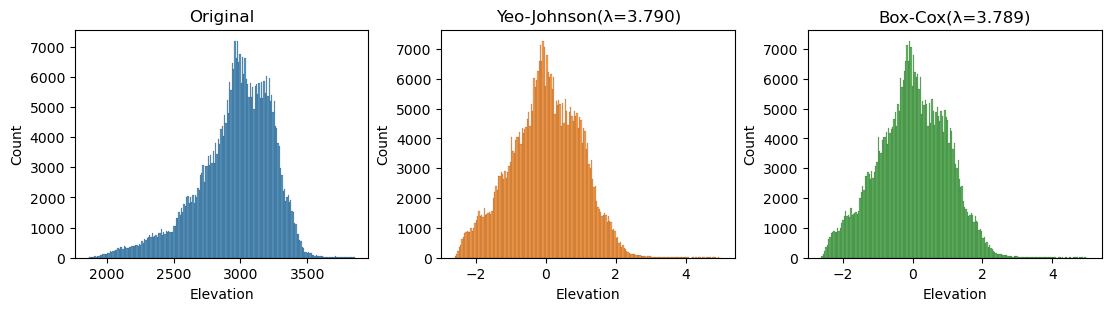

In [28]:
fig, axes = plt.subplots(figsize=(11, 3), nrows=1, ncols=3, layout='constrained')

sns.histplot(data=X_train, x='Elevation', ax=axes[0], color='C0')
sns.histplot(data=X_train_pt_yj[:, 0], ax=axes[1], color='C1')
sns.histplot(data=X_train_pt_bc[:, 0], ax=axes[2], color='C2')

axes[0].set_title('Original')
axes[1].set_title('Yeo-Johnson(λ=3.790)')
axes[2].set_title('Box-Cox(λ=3.789)')

axes[1].set_xlabel('Elevation')
axes[2].set_xlabel('Elevation')

plt.show()

## Normalization
- Scale individual samples to have unit norm
- Useful when using quadratic form(dot-product) or kernel to quantify the similarity of any pair of samples

In [30]:
from sklearn.preprocessing import normalize

normalize(X_train.iloc[:, :10], norm='l1')

array([[0.42330693, 0.05269113, 0.00080815, ..., 0.03782124, 0.02683045,
        0.27751738],
       [0.50840336, 0.01276665, 0.00177763, ..., 0.03555268, 0.01890756,
        0.1769554 ],
       [0.26518022, 0.02397109, 0.00105755, ..., 0.02141535, 0.01709703,
        0.11659469],
       ...,
       [0.40480164, 0.03684684, 0.00218257, ..., 0.03042753, 0.02631917,
        0.26254975],
       [0.32385883, 0.03677092, 0.00221893, ..., 0.02134404, 0.01680051,
        0.06593407],
       [0.29831144, 0.00256739, 0.00157993, ..., 0.02014417, 0.01234324,
        0.24646983]])

In [31]:
from sklearn.preprocessing import Normalizer

pipe = make_pipeline(Normalizer(), DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

0.8679892601431981

## Encoding categorical features

In [33]:
# Aggregate categorical features for practice

Wilderness_Area = []
Soil_Type = []

for i in range(X_train.shape[0]):
    wv = X_train.iloc[i, 10:14][X_train.iloc[i, 10:14] == 1].index[0]
    sv = X_train.iloc[i, 14:][X_train.iloc[i, 14:] == 1].index[0]
    Wilderness_Area.append(wv)
    Soil_Type.append(sv)

len(Wilderness_Area), len(Soil_Type)

(406708, 406708)

In [34]:
X_train_cat = pd.DataFrame({'Wilderness_Area': Wilderness_Area, 'Soil_Type': Soil_Type})
X_train_cat

,Wilderness_Area,Soil_Type
0,Wilderness_Area_0,Soil_Type_11
1,Wilderness_Area_0,Soil_Type_19
2,Wilderness_Area_0,Soil_Type_28
3,Wilderness_Area_2,Soil_Type_12
4,Wilderness_Area_0,Soil_Type_22
...,...,...
406703,Wilderness_Area_0,Soil_Type_22
406704,Wilderness_Area_0,Soil_Type_28
406705,Wilderness_Area_2,Soil_Type_31
406706,Wilderness_Area_0,Soil_Type_28


In [35]:
X_train_cat.describe(include='O')

,Wilderness_Area,Soil_Type
count,406708,406708
unique,4,40
top,Wilderness_Area_0,Soil_Type_28
freq,182485,80543


### Ordinal Encoder
- Transform each categorical feature to one new feature of integers (0 to `n_categories`-1)
- Intergret categories as being ordered
- Passthrough missing values(can use `encoded_missing_value` parameter to encode missing values)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()
ore.fit_transform(X_train_cat)

array([[ 0.,  3.],
       [ 0., 11.],
       [ 0., 21.],
       ...,
       [ 2., 25.],
       [ 0., 21.],
       [ 0., 16.]])

### OneHotEncoder
- Transform each categorical feature into `n_categories` binary features
- `handle_unknown`: {‘error’, ‘ignore’, ‘infrequent_if_exist’, ‘warn’}, default=’error’
  - 'error': Raise an error
  - 'ignore': Result for an unknown category will be all zeros
  - 'infrequent_if_exist': Result will map to the infrequent category if it exists. If not, same as 'ignore'
  - 'warn': Warning is issued and same as 'infrequent_if_exist'
- `drop`: {'first', 'if_binary'} or an array_like of shape (n_features), default=None
  : Drop one of the categories per feature
  - Prevent problems with co-linearity
- `sparse_output`: bool, default=True
  - True: Return a scipy.sparse.csr_matrix

In [39]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe.fit_transform(X_train_cat)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Infrequent categories
- `min_frequency`: int or float, default=None
  : Minimum frequency below which a category will be considered infrequent
  - int: Use integer itself
  - float: Use `min_frequency * n_samples`
- `max_categories`: int, default=None
  : Upper limit to the number of output categories for each input features
  - Put infrequent categories into one category
  - Do not take missing or unknown categories into account
    - Can set `unknown_value` or `encoded_missing_value` to an integer instead

In [41]:
# min_frequency=100 with OrdinalEncoder
ore = OrdinalEncoder(min_frequency=100)
ore.fit(X_train_cat)
ore.infrequent_categories_

[None, array(['Soil_Type_14', 'Soil_Type_35', 'Soil_Type_6'], dtype=object)]

In [42]:
# max_categories=10 with OrdinalEncoder
ore = OrdinalEncoder(max_categories=10)
ore.fit(X_train_cat)
ore.infrequent_categories_

[None,
 array(['Soil_Type_0', 'Soil_Type_1', 'Soil_Type_10', 'Soil_Type_12',
        'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
        'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_2',
        'Soil_Type_20', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
        'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_3', 'Soil_Type_33',
        'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
        'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_4', 'Soil_Type_5',
        'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8'], dtype=object)]

In [43]:
# min_frequency=100 with OneHotEncoder
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False, min_frequency=100)
ohe.fit(X_train_cat)
ohe.get_feature_names_out()

array(['Wilderness_Area_Wilderness_Area_0',
       'Wilderness_Area_Wilderness_Area_1',
       'Wilderness_Area_Wilderness_Area_2',
       'Wilderness_Area_Wilderness_Area_3', 'Soil_Type_Soil_Type_0',
       'Soil_Type_Soil_Type_1', 'Soil_Type_Soil_Type_10',
       'Soil_Type_Soil_Type_11', 'Soil_Type_Soil_Type_12',
       'Soil_Type_Soil_Type_13', 'Soil_Type_Soil_Type_15',
       'Soil_Type_Soil_Type_16', 'Soil_Type_Soil_Type_17',
       'Soil_Type_Soil_Type_18', 'Soil_Type_Soil_Type_19',
       'Soil_Type_Soil_Type_2', 'Soil_Type_Soil_Type_20',
       'Soil_Type_Soil_Type_21', 'Soil_Type_Soil_Type_22',
       'Soil_Type_Soil_Type_23', 'Soil_Type_Soil_Type_24',
       'Soil_Type_Soil_Type_25', 'Soil_Type_Soil_Type_26',
       'Soil_Type_Soil_Type_27', 'Soil_Type_Soil_Type_28',
       'Soil_Type_Soil_Type_29', 'Soil_Type_Soil_Type_3',
       'Soil_Type_Soil_Type_30', 'Soil_Type_Soil_Type_31',
       'Soil_Type_Soil_Type_32', 'Soil_Type_Soil_Type_33',
       'Soil_Type_Soil_Type_34', 'S

In [44]:
# min_frequency=100 and max_categories=5 with OrdinalEncoder
# min_frequency first, max_categories next

ohe = OneHotEncoder(sparse_output=False, min_frequency=100, max_categories=10)
ohe.fit(X_train_cat)
ohe.infrequent_categories_

[None,
 array(['Soil_Type_0', 'Soil_Type_1', 'Soil_Type_10', 'Soil_Type_12',
        'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16',
        'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_2',
        'Soil_Type_20', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25',
        'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_3', 'Soil_Type_33',
        'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37',
        'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_4', 'Soil_Type_5',
        'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8'], dtype=object)]

### Target Encoder
- Mixes the global target mean with the target mean conditioned on the value of the category
- Considers missing values as another category
- Useful with categorical features with high cardinality
- `smooth`: 'auto' or float, default='auto'  
  : The amount of mixing of the target mean conditioned on the value of the category with the global target mean
  - 'auto': Empirical Bayes estimate
  - float: Higer -> more weigh on global mean

In [179]:
from sklearn.preprocessing import TargetEncoder

te = TargetEncoder()
te.fit_transform(X_train_cat, y_train)
te.encodings_

[array([0.40547967, 0.62319594, 0.34527669, 0.        ]),
 array([0.56046759, 0.30070745, 0.49376883, 0.08118463]),
 array([0.        , 0.        , 0.05657953, 0.58092266]),
 array([0.        , 0.        , 0.        , 0.07513291]),
 array([0.01437927, 0.        , 0.02216012, 0.        ]),
 array([0.        , 0.        , 0.03001326, 0.26258111]),
 array([0.0196729 , 0.07608765, 0.05220149, 0.        ]),
 array([0.        , 0.        , 0.0598543 , 0.08953418, 0.1245017 ,
        0.        , 0.        , 0.21554191, 0.06577295, 0.04100576,
        0.60582592, 0.40089715, 0.        , 0.95590004, 0.77534238,
        0.61716628, 0.52365031, 0.25252627, 0.11054839, 0.56926956,
        0.04670825, 0.36405399, 0.25392516, 0.01493135, 0.46047595,
        0.40607423, 0.399486  , 0.06145498, 0.48358437, 0.1307497 ,
        0.        , 0.56186811, 0.57045015, 0.54739512, 0.        ,
        0.        , 0.        , 0.24500228, 0.13214815, 0.02946492]),
 array([0.        , 0.11488601, 0.73205293, 0.91

In [181]:
# High smooth value
te = TargetEncoder(smooth=100000)
te.fit_transform(X_train_cat, y_train)
te.encodings_

[array([0.39100686, 0.40948069, 0.35224459, 0.2894375 ]),
 array([0.5345962 , 0.45498307, 0.491466  , 0.40364863]),
 array([0.02186112, 0.05103626, 0.05844597, 0.16879372]),
 array([0.00169903, 0.00396651, 0.00173108, 0.01930626]),
 array([0.01499189, 0.01331381, 0.01997794, 0.01278894]),
 array([0.01056673, 0.02466874, 0.02995417, 0.07783739]),
 array([0.02527817, 0.04255093, 0.04618025, 0.02818758]),
 array([0.35700579, 0.34640924, 0.34023289, 0.31669177, 0.33874602,
        0.36309614, 0.36458844, 0.36172507, 0.35766826, 0.36023137,
        0.37102701, 0.366787  , 0.35265484, 0.36807672, 0.44271879,
        0.43738084, 0.38514354, 0.36422287, 0.36014436, 0.3661457 ,
        0.36249514, 0.36435405, 0.34530839, 0.33658584, 0.37920793,
        0.37576951, 0.37297149, 0.36122555, 0.36617963, 0.36439599,
        0.36384258, 0.38401094, 0.38282221, 0.37507964, 0.36051827,
        0.34862521, 0.36436618, 0.36443832, 0.3627429 , 0.30212817]),
 array([0.47723799, 0.46880197, 0.50694557, 0.56

In [183]:
# Low smooth value
te = TargetEncoder(smooth=0.1)
te.fit_transform(X_train_cat, y_train)
te.encodings_

[array([4.05479880e-01, 6.23207187e-01, 3.45276590e-01, 1.40406795e-06]),
 array([0.56046794, 0.30070086, 0.49376886, 0.08118152]),
 array([3.38407788e-08, 2.94053069e-07, 5.65795070e-02, 5.81004663e-01]),
 array([2.63008442e-09, 2.28536228e-08, 2.70768637e-09, 7.51720631e-02]),
 array([1.43792650e-02, 7.67094962e-08, 2.21601613e-02, 6.20394192e-08]),
 array([1.63571849e-08, 1.42132675e-07, 3.00132576e-02, 2.62640148e-01]),
 array([1.96728585e-02, 7.60914214e-02, 5.22016210e-02, 1.36738592e-07]),
 array([1.71485692e-05, 6.94454829e-06, 5.98492893e-02, 8.95308947e-02,
        1.24494323e-01, 8.82584676e-05, 1.73617014e-02, 2.15494096e-01,
        6.57521637e-02, 4.09892909e-02, 6.05907914e-01, 4.00902440e-01,
        1.07674236e-05, 9.55981185e-01, 7.75353782e-01, 6.17172016e-01,
        5.23660786e-01, 2.52285979e-01, 1.10502193e-01, 5.69526912e-01,
        4.66643506e-02, 3.64053984e-01, 2.53921396e-01, 1.49328165e-02,
        4.60481140e-01, 4.06075288e-01, 3.99487037e-01, 6.14148737

## Discretization
- Partition continuous features into discrete values

### K-bins discretization
- `n_bins`: int or array-like of shape (n_features,), default=5
- `encode`: {'onehot', 'onehot-dense', 'ordinal'}, default='onehot'
  - 'onehot': Encode with one-hot encoding and return a sparse matrix
  - 'onehot-dense': Encode with one-hot encoding and return a dense array
  - 'ordinal': return the bin identifier encoded as integer value
- `strategy`: {'uniform', 'quantile', 'kmeans'}, default='quantile'
  - 'uniform': All bins have identical widths
  - 'quantile': All bins have the same number of points
  - 'kmeans': Values in each bin have the smae nearest center of a 1D k-means cluster

In [118]:
from sklearn.preprocessing import KBinsDiscretizer

kbd = KBinsDiscretizer(encode='ordinal')
print(kbd.fit_transform(X_train.iloc[:, :10])[0])

pipe = make_pipeline(kbd, DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

[0. 4. 0. 0. 1. 0. 1. 3. 3. 2.]


0.779890306590784

In [120]:
# Use strategy='kmeans'

import os # To silence a warning
os.environ['OMP_NUM_THREADS'] = '1'

kbd = KBinsDiscretizer(encode='ordinal', strategy='kmeans')
print(kbd.fit_transform(X_train.iloc[:, :10])[0])

pipe = make_pipeline(kbd, DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

[1. 4. 0. 0. 0. 0. 2. 3. 3. 1.]


0.7721853772718927

### Feature binarization
- Threshold numerical features to get boolean values
- When input data is distributit according to a multi-variate Bernoulli distribution
- Often used when text processing to use binary feature values

In [134]:
from sklearn.preprocessing import Binarizer

bn = Binarizer(threshold=200)
print(bn.fit_transform(X_train.iloc[:, :10])[0])

pipe = make_pipeline(bn, DecisionTreeClassifier())
pipe.fit(X_train.iloc[:, :10], y_train)
pipe.score(X_test.iloc[:, :10], y_test)

[1. 1. 0. 0. 0. 1. 1. 1. 0. 1.]


0.49310973930604

## Generating polynomial features

### Polynomial features
- Used implicitely in kernel methods(e.g., SVC, KernelPCA)

In [194]:
# Transform from (X1, X2) to (1, X1, X2, X1^2, X1X2, X2^2)
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit_transform(X_train.loc[:, ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']])

array([[1.00000e+00, 6.00000e+01, 5.00000e+00, 3.60000e+03, 3.00000e+02,
        2.50000e+01],
       [1.00000e+00, 1.75000e+02, 5.70000e+01, 3.06250e+04, 9.97500e+03,
        3.24900e+03],
       [1.00000e+00, 5.77000e+02, 3.30000e+01, 3.32929e+05, 1.90410e+04,
        1.08900e+03],
       ...,
       [1.00000e+00, 3.35000e+02, 4.10000e+01, 1.12225e+05, 1.37350e+04,
        1.68100e+03],
       [1.00000e+00, 1.24000e+02, 1.90000e+01, 1.53760e+04, 2.35600e+03,
        3.61000e+02],
       [1.00000e+00, 6.00000e+01, 7.00000e+00, 3.60000e+03, 4.20000e+02,
        4.90000e+01]])

In [196]:
# interaction_only=True: Only interaction terms among features
poly = PolynomialFeatures(2, interaction_only=True)
poly.fit_transform(X_train.loc[:, ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']])

array([[1.0000e+00, 6.0000e+01, 5.0000e+00, 3.0000e+02],
       [1.0000e+00, 1.7500e+02, 5.7000e+01, 9.9750e+03],
       [1.0000e+00, 5.7700e+02, 3.3000e+01, 1.9041e+04],
       ...,
       [1.0000e+00, 3.3500e+02, 4.1000e+01, 1.3735e+04],
       [1.0000e+00, 1.2400e+02, 1.9000e+01, 2.3560e+03],
       [1.0000e+00, 6.0000e+01, 7.0000e+00, 4.2000e+02]])